170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


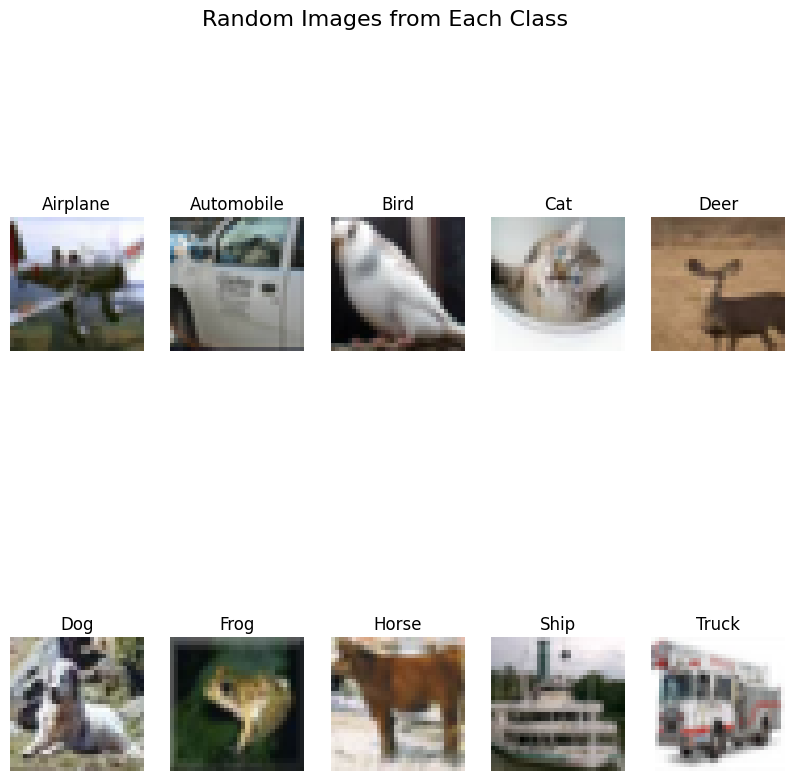

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import random

# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

# Normalize data
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# One-hot encode labels
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)

class_names = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

# Show random images from all classes
plt.figure(figsize=(10, 10))
for i in range(10):
    idx = random.choice(np.where(y_train.flatten() == i)[0])
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_train[idx])
    plt.title(class_names[i])
    plt.axis('off')
plt.suptitle('Random Images from Each Class', fontsize=16)
plt.show()

In [ ]:
# Neural Network (NN) model
nn_model = models.Sequential([
    layers.Flatten(input_shape=(32, 32, 3)),
    layers.Dense(512, activation='relu'),
    layers.Dense(256, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Compile NN model
nn_model.compile(optimizer='adam',
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])

# Train NN model
nn_history = nn_model.fit(x_train, y_train_cat, epochs=10, batch_size=64, validation_split=0.2)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 23s 34ms/step - accuracy: 0.2566 - loss: 2.0491 - val_accuracy: 0.3599 - val_loss: 1.7889
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 39s 31ms/step - accuracy: 0.3754 - loss: 1.7394 - val_accuracy: 0.3963 - val_loss: 1.6763
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 21s 34ms/step - accuracy: 0.4175 - loss: 1.6300 - val_accuracy: 0.4290 - val_loss: 1.5944
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 41s 34ms/step - accuracy: 0.4344 - loss: 1.5698 - val_accuracy: 0.4170 - val_loss: 1.6424
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 41s 34ms/step - accuracy: 0.4481 - loss: 1.5387 - val_accuracy: 0.4444 - val_loss: 1.5764
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 41s 34ms/step - accuracy: 0.4635 - loss: 1.4987 - val_accuracy: 0.4493 - val_loss: 1.5519
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 20s 32ms/step - accuracy: 0.4783 - loss: 1.4512 - val_accuracy: 0.4703 - val_loss: 1.4934
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 20s 33ms/step - accuracy: 0.4899 - loss: 1.4260 - 

In [ ]:
# CNN model
cnn_model = models.Sequential([
    layers.Input(shape=(32, 32, 3)),
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Compile CNN model
cnn_model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

# Train CNN model
cnn_history = cnn_model.fit(x_train, y_train_cat, epochs=10, batch_size=64, validation_split=0.2)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 61s 94ms/step - accuracy: 0.3173 - loss: 1.8452 - val_accuracy: 0.4999 - val_loss: 1.3824
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 58s 93ms/step - accuracy: 0.5169 - loss: 1.3436 - val_accuracy: 0.5759 - val_loss: 1.2093
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 58s 92ms/step - accuracy: 0.5901 - loss: 1.1588 - val_accuracy: 0.6194 - val_loss: 1.0765
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 82s 92ms/step - accuracy: 0.6349 - loss: 1.0461 - val_accuracy: 0.6161 - val_loss: 1.0981
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 81s 91ms/step - accuracy: 0.6610 - loss: 0.9659 - val_accuracy: 0.6542 - val_loss: 1.0004
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 86s 98ms/step - accuracy: 0.6836 - loss: 0.8973 - val_accuracy: 0.6659 - val_loss: 0.9738
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 78s 92ms/step - accuracy: 0.7027 - loss: 0.8503 - val_accuracy: 0.6700 - val_loss: 0.9694
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 86s 99ms/step - accuracy: 0.7216 - loss: 0.7982 - 

313/313 - 2s - 5ms/step - accuracy: 0.4743 - loss: 1.4768
313/313 - 5s - 17ms/step - accuracy: 0.7077 - loss: 0.8759

Neural Network Test Accuracy: 0.47429999709129333
Convolutional Neural Network Test Accuracy: 0.7077000141143799


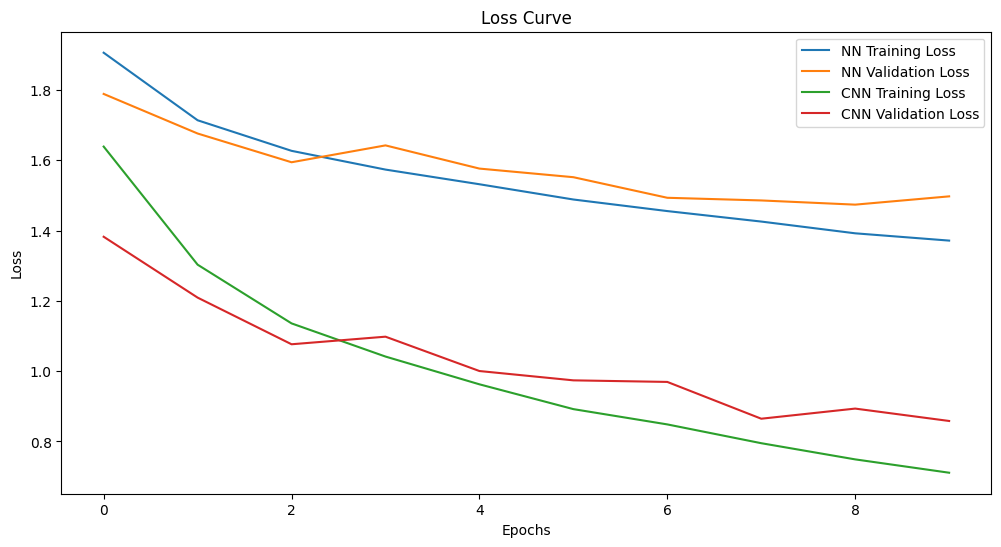

In [ ]:
# Evaluate both models
nn_test_loss, nn_test_acc = nn_model.evaluate(x_test, y_test_cat, verbose=2)
cnn_test_loss, cnn_test_acc = cnn_model.evaluate(x_test, y_test_cat, verbose=2)

print("\nNeural Network Test Accuracy:", nn_test_acc)
print("Convolutional Neural Network Test Accuracy:", cnn_test_acc)

# Plot loss curve for both models
plt.figure(figsize=(12, 6))
plt.plot(nn_history.history['loss'], label='NN Training Loss')
plt.plot(nn_history.history['val_loss'], label='NN Validation Loss')
plt.plot(cnn_history.history['loss'], label='CNN Training Loss')
plt.plot(cnn_history.history['val_loss'], label='CNN Validation Loss')
plt.title('Loss Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
# Display model summaries
print("\nNeural Network Model Summary:")
nn_model.summary()

print("\nConvolutional Neural Network Model Summary:")
cnn_model.summary()


Neural Network Model Summary:


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 3072)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │       1,573,376 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,216,672 (19.90 MB)

 Trainable params: 1,738,890 (6.63 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 3,477,782 (13.27 MB)


Convolutional Neural Network Model Summary:


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 4, 4, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │          65,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 367,712 (1.40 MB)

 Trainable params: 122,570 (478.79 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 245,142 (957.59 KB)

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step


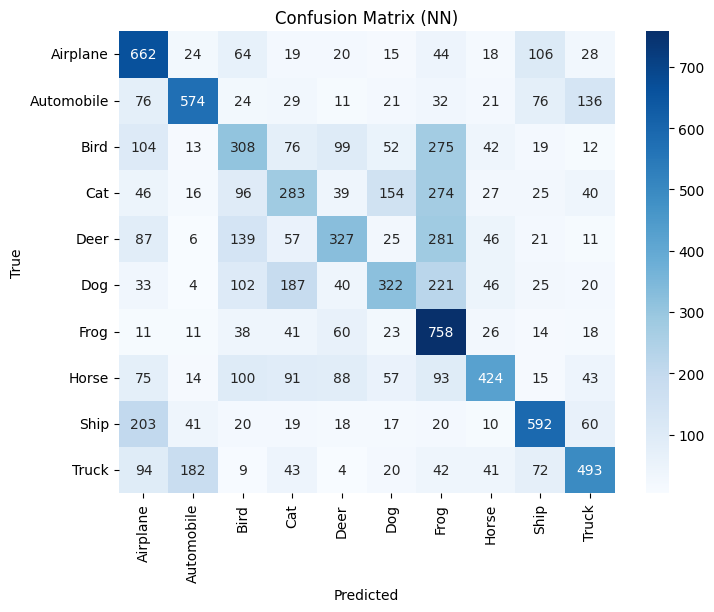


Classification Report (NN):
               precision    recall  f1-score   support

    Airplane       0.48      0.66      0.55      1000
  Automobile       0.65      0.57      0.61      1000
        Bird       0.34      0.31      0.32      1000
         Cat       0.33      0.28      0.31      1000
        Deer       0.46      0.33      0.38      1000
         Dog       0.46      0.32      0.38      1000
        Frog       0.37      0.76      0.50      1000
       Horse       0.60      0.42      0.50      1000
        Ship       0.61      0.59      0.60      1000
       Truck       0.57      0.49      0.53      1000

    accuracy                           0.47     10000
   macro avg       0.49      0.47      0.47     10000
weighted avg       0.49      0.47      0.47     10000



In [ ]:
# Show confusion matrix and classification report for NN
y_pred_nn = np.argmax(nn_model.predict(x_test), axis=1)
y_true = y_test.flatten()

cm_nn = confusion_matrix(y_test, y_pred_nn)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_nn, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix (NN)')
plt.show()

report = classification_report(y_true, y_pred_nn, target_names=class_names)
print("\nClassification Report (NN):\n", report)

313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 20ms/step


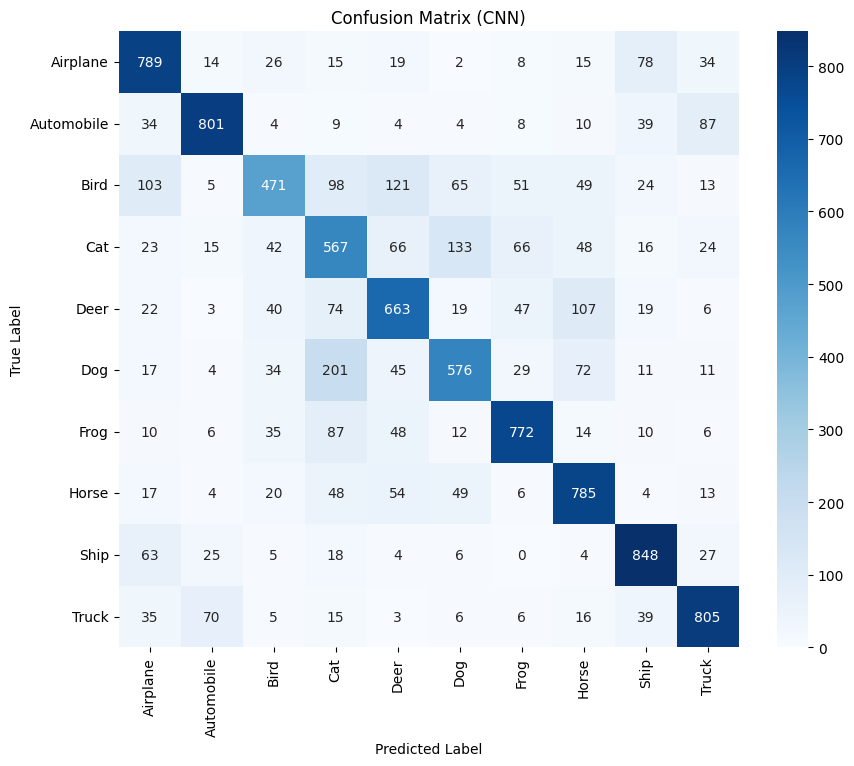


Classification Report (CNN):
               precision    recall  f1-score   support

    Airplane       0.71      0.79      0.75      1000
  Automobile       0.85      0.80      0.82      1000
        Bird       0.69      0.47      0.56      1000
         Cat       0.50      0.57      0.53      1000
        Deer       0.65      0.66      0.65      1000
         Dog       0.66      0.58      0.62      1000
        Frog       0.78      0.77      0.77      1000
       Horse       0.70      0.79      0.74      1000
        Ship       0.78      0.85      0.81      1000
       Truck       0.78      0.81      0.79      1000

    accuracy                           0.71     10000
   macro avg       0.71      0.71      0.71     10000
weighted avg       0.71      0.71      0.71     10000



In [ ]:
# Show confusion matrix and classification report for CNN
y_pred_cnn = np.argmax(cnn_model.predict(x_test), axis=1)
y_true = y_test.flatten()

cm_cnn = confusion_matrix(y_true, y_pred_cnn)
plt.figure(figsize=(10, 8))
sns.heatmap(cm_cnn, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix (CNN)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

report = classification_report(y_true, y_pred_cnn, target_names=class_names)
print("\nClassification Report (CNN):\n", report)

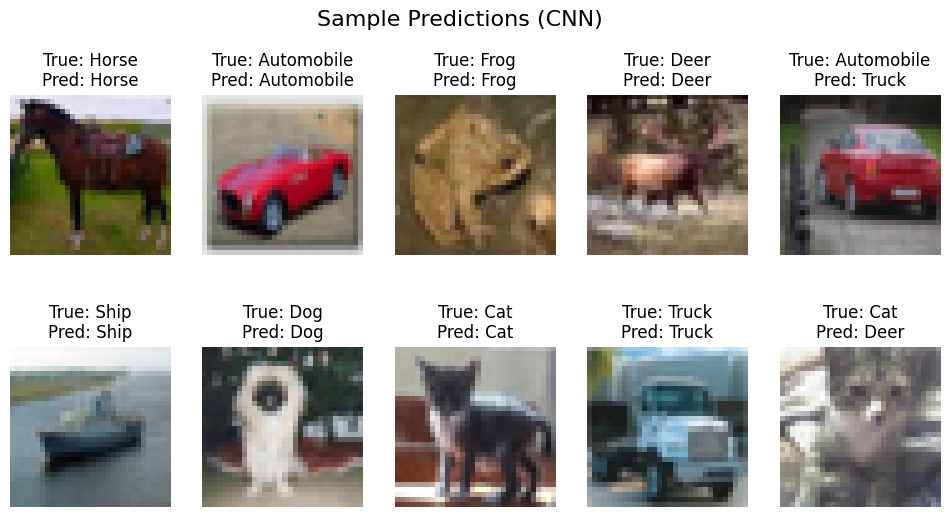

In [ ]:
# Show a few predictions
plt.figure(figsize=(12, 6))
for i in range(10):
    idx = random.randint(0, len(x_test) - 1)
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_test[idx])
    plt.title(f"True: {class_names[y_test[idx][0]]}\nPred: {class_names[y_pred_cnn[idx]]}")
    plt.axis('off')
plt.suptitle('Sample Predictions (CNN)', fontsize=16)
plt.show()

Task 1

In [ ]:
from tensorflow.keras import layers, models

# Modified CNN Model Architecture
modified_cnn_model = models.Sequential([
    layers.Input(shape=(32, 32, 3)),

    # First Convolution Block
    layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),

    # Second Convolution Block
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),

    # Third Convolution Block
    layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),

    # Fourth Convolution Block (added for more depth)
    layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),

    # Flattening and Fully Connected Layers
    layers.Flatten(),
    layers.Dropout(0.5),  # Dropout to reduce overfitting
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.5),  # Dropout again
    layers.Dense(10, activation='softmax')
])

# Compile the model
modified_cnn_model.compile(optimizer='adam',
                           loss='categorical_crossentropy',
                           metrics=['accuracy'])

# Train the modified model
modified_cnn_history = modified_cnn_model.fit(x_train, y_train_cat, epochs=10, batch_size=64, validation_split=0.2)


Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 196s 305ms/step - accuracy: 0.3276 - loss: 2.2002 - val_accuracy: 0.3527 - val_loss: 1.7186
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 197s 297ms/step - accuracy: 0.5265 - loss: 1.3059 - val_accuracy: 0.4998 - val_loss: 1.3691
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 199s 292ms/step - accuracy: 0.6045 - loss: 1.1155 - val_accuracy: 0.5885 - val_loss: 1.1991
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 186s 297ms/step - accuracy: 0.6657 - loss: 0.9550 - val_accuracy: 0.6876 - val_loss: 0.8839
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 201s 295ms/step - accuracy: 0.7091 - loss: 0.8335 - val_accuracy: 0.7088 - val_loss: 0.8488
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 201s 294ms/step - accuracy: 0.7383 - loss: 0.7592 - val_accuracy: 0.7067 - val_loss: 0.8508
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 202s 293ms/step - accuracy: 0.7662 - loss: 0.6821 - val_accuracy: 0.7291 - val_loss: 0.7752
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 205s 298ms/step - accuracy: 0.7819 -

Task 2

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

# Load Fashion-MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

# Normalize the images to be in the range [0, 1]
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Reshape the images to have a single channel (grayscale)
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

# One-hot encode the labels
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)

# Define class names for Fashion-MNIST
class_names = ['T-shirt', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle Boot']


29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
# Modified CNN Model Architecture for Fashion-MNIST
modified_fashion_cnn_model = models.Sequential([
    layers.Input(shape=(28, 28, 1)),  # Input shape for Fashion-MNIST

    # First Convolution Block
    layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),

    # Second Convolution Block
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),

    # Third Convolution Block
    layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),

    # Fourth Convolution Block
    layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),

    # Flattening and Fully Connected Layers
    layers.Flatten(),
    layers.Dropout(0.5),  # Dropout to reduce overfitting
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.5),  # Dropout again
    layers.Dense(10, activation='softmax')  # 10 output classes for Fashion-MNIST
])

# Compile the model
modified_fashion_cnn_model.compile(optimizer='adam',
                                   loss='categorical_crossentropy',
                                   metrics=['accuracy'])

# Train the model on Fashion-MNIST data
fashion_cnn_history = modified_fashion_cnn_model.fit(x_train, y_train_cat, epochs=10, batch_size=64, validation_split=0.2)




Epoch 1/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 176s 226ms/step - accuracy: 0.7292 - loss: 0.8230 - val_accuracy: 0.8593 - val_loss: 0.3733
Epoch 2/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 193s 215ms/step - accuracy: 0.8756 - loss: 0.3459 - val_accuracy: 0.8943 - val_loss: 0.2972
Epoch 3/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 202s 215ms/step - accuracy: 0.8994 - loss: 0.2814 - val_accuracy: 0.9113 - val_loss: 0.2478
Epoch 4/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 201s 214ms/step - accuracy: 0.9142 - loss: 0.2435 - val_accuracy: 0.8900 - val_loss: 0.2923
Epoch 5/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 202s 215ms/step - accuracy: 0.9188 - loss: 0.2278 - val_accuracy: 0.9057 - val_loss: 0.2592
Epoch 6/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 204s 218ms/step - accuracy: 0.9259 - loss: 0.2074 - val_accuracy: 0.9200 - val_loss: 0.2160
Epoch 7/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 162s 216ms/step - accuracy: 0.9338 - loss: 0.1829 - val_accuracy: 0.9122 - val_loss: 0.2464
Epoch 8/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 203s 218ms/step - accuracy: 0.9392 -

In [ ]:
# Evaluate the performance of the modified CNN model on Fashion-MNIST test set
fashion_cnn_test_loss, fashion_cnn_test_acc = modified_fashion_cnn_model.evaluate(x_test, y_test_cat, verbose=2)

print("\nModified CNN Test Accuracy on Fashion-MNIST:", fashion_cnn_test_acc)


313/313 - 15s - 47ms/step - accuracy: 0.9188 - loss: 0.2461

Modified CNN Test Accuracy on Fashion-MNIST: 0.9187999963760376


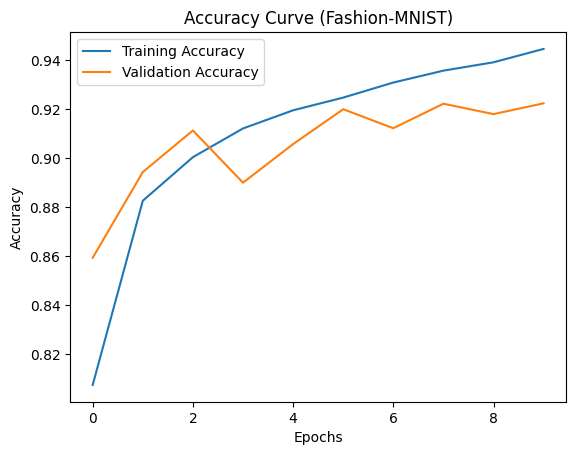

In [ ]:
# Plot accuracy curve
plt.plot(fashion_cnn_history.history['accuracy'], label='Training Accuracy')
plt.plot(fashion_cnn_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Curve (Fashion-MNIST)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
